In [3]:
from fastai import *
from fastai.vision import *

In [4]:
folder = 'black'
file = 'urls_black.txt'

In [12]:
folder = 'teddys'
file = 'urls_teddys.csv'

In [15]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [5]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path

PosixPath('data/bears')

In [7]:
classes = ['teddys','grizzly','black']

In [6]:
download_images(path/file, dest, max_pics=200)

Error https://morriscountynj.gov/wp-content/uploads/2019/04/19_0027_2.jpg									 HTTPSConnectionPool(host='morriscountynj.gov', port=443): Read timed out. (read timeout=4)
Error https://wesa.org/sites/wesa/files/styles/medium/public/201806/black_bears.jpg									 HTTPSConnectionPool(host='wesa.org', port=443): Max retries exceeded with url: /sites/wesa/files/styles/medium/public/201806/black_bears.jpg%09%09%09%09%09%09%09%09%09 (Caused by SSLError(SSLCertVerificationError("hostname 'wesa.org' doesn't match either of '*.drupal.publicbroadcasting.net', 'drupal.publicbroadcasting.net'")))


In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=3)
    

teddys


grizzly


black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000038.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000158.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000004.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000159.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000173.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/b

/Users/m785017/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1044: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


cannot identify image file <_io.BufferedReader name='data/bears/black/00000063.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000052.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000046.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000053.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000133.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000119.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000125.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000079.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/b

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes


['black', 'grizzly', 'teddys']

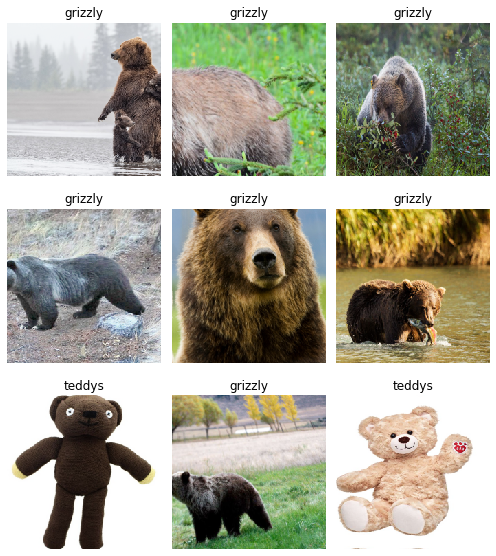

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 360, 89)

## Train Model

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.222177,0.510705,0.157303,01:52
1,0.633907,0.483648,0.056180,01:54
2,0.414675,0.410462,0.044944,01:54
3,0.312638,0.358396,0.033708,01:55


In [16]:
learn.save('stage-1')

In [17]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (360 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears;

Valid: LabelList (89 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,teddys,grizzly,teddys
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

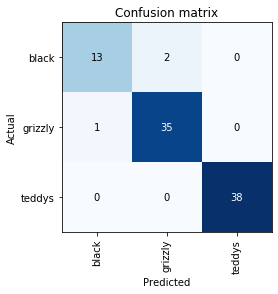

In [19]:
interp.plot_confusion_matrix()

In [20]:
interp.most_confused(min_val=2)

[('black', 'grizzly', 2)]

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


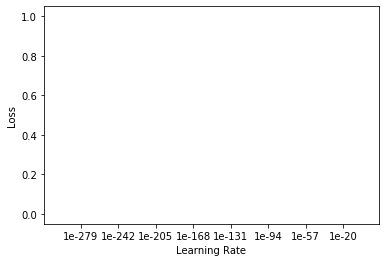

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.129266,0.286206,0.033708,02:35
1,0.101028,0.273738,0.022472,02:33


In [25]:
learn.save('stage-2')

In [26]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (360 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears;

Valid: LabelList (89 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,teddys,grizzly,teddys
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

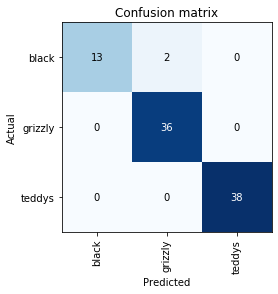

In [28]:
interp.plot_confusion_matrix()

In [29]:
learn.unfreeze()

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.recorder.plot()

In [82]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [83]:
fd = FileDeleter(file_paths=top_loss_paths)

NameError: name 'FileDeleter' is not defined